# Atelier Pratique Détection d'anomalies

In [18]:
import sys
import numpy as np
np.set_printoptions(threshold=sys.maxsize)#np.nan
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score

## 1. Données abérrantes dans les Mouses

In [7]:
mouse = pd.read_csv('/Users/komlan/Project_M2/Algo_Big_Data/Data/mouse.txt', sep=' ', names=["x1","x2"], header=None)
print("Taille", mouse.shape)
X = mouse.values
mouse.head()

Taille (500, 2)


,x1,x2
0,0.456601,0.432806
1,0.611378,0.528625
2,0.450299,0.711606
3,0.639015,0.460744
4,0.628957,0.323470


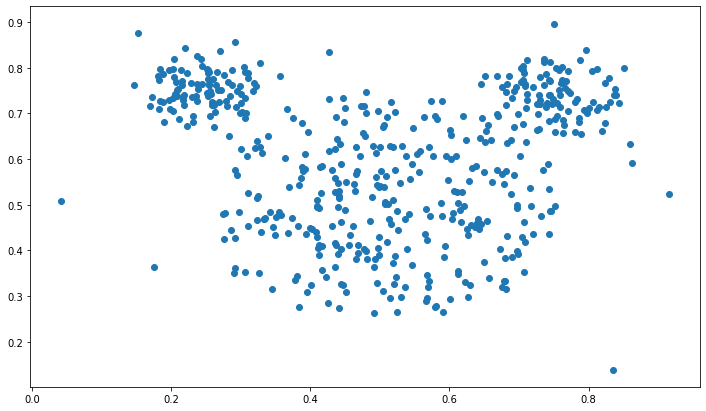

In [8]:
plt.figure(figsize=(12, 7))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [57]:
import matplotlib.colors as mcolors
from sklearn.ensemble import IsolationForest
classifier = IsolationForest(n_estimators=100, max_samples='auto', random_state=np.random.RandomState(42))
classifier.fit(X)
predictions = classifier.predict(X)

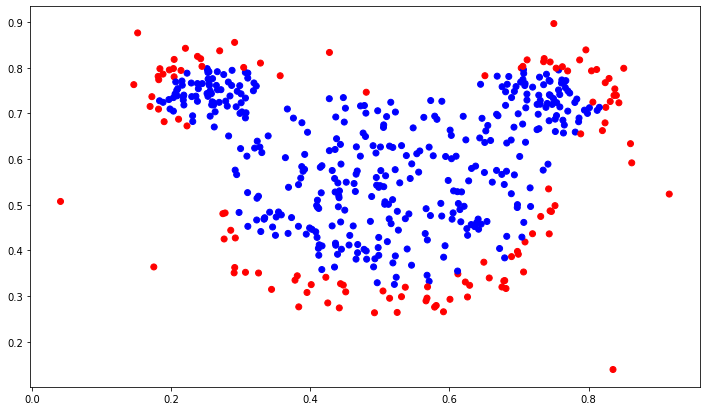

In [58]:
def plot_clustering(X, prediction):
    colors = ['red','blue']
    plt.figure(figsize=(12, 7))
    plt.scatter(X[:, 0], X[:, 1], c= prediction, cmap=mcolors.ListedColormap(colors))
    plt.show()
plot_clustering(X, predictions)

## 2. Données abérrantes dans les cartes de crédits

In [17]:
creditcard = pd.read_csv('/Users/komlan/Project_M2/Algo_Big_Data/Data/credit_scoring.csv', sep=';')
print("Taille", creditcard.shape)
#X = mouse.values
creditcard.head()

Taille (4375, 14)


,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


<AxesSubplot:xlabel='Status', ylabel='count'>

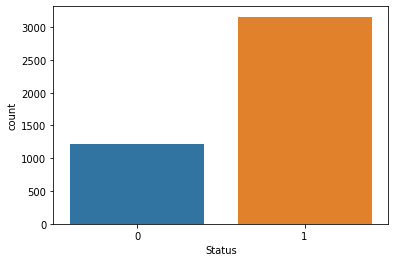

In [20]:
sns.countplot(creditcard["Status"])

In [59]:
labels = creditcard["Status"].values
X_c = creditcard.drop(["Status","Time"], axis=1).values
scaler = StandardScaler()
X_norm = scaler.fit_transform(X_c)
classify = IsolationForest(n_estimators=100, max_samples='auto', random_state=np.random.RandomState(42))
classify.fit(X_norm)
predict = classify.predict(X_norm)
predicts = [(p - 1 if p == 1 else p + 2) for p in predict]

In [60]:
print("Score ", accuracy_score(labels, predicts))
print(classification_report(labels, predicts))

Score  0.31725714285714285
              precision    recall  f1-score   support

           0       0.25      0.75      0.38      1216
           1       0.61      0.15      0.24      3159

    accuracy                           0.32      4375
   macro avg       0.43      0.45      0.31      4375
weighted avg       0.51      0.32      0.28      4375



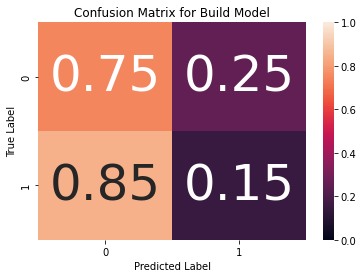

In [61]:
#plot_clustering(X_norm, predict)
def plot_confusion_matrix(cm, classes=None, title=None):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0, vmax=1, annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0, vmax=1)
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
#Build Model
cm_bdt = confusion_matrix(labels, predicts)
cm_bdt_norm = cm_bdt/cm_bdt.sum(axis=1)[:, np.newaxis]
classes = np.unique(labels)
plot_confusion_matrix(cm_bdt_norm, classes, title="Confusion Matrix for Build Model")